In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
def func(x):
    return np.exp(-x) - x 

In [3]:
def Muller(f,x0,x1,itmax = 10, tolerancia=1e-15):
    
    # Geometry
    l0,l1 = x0,x1
    
    error = 1
    it = 0
    
    # Tercer punto igual al punto medio
    x2 = (x0 + x1)/2. 
    
    while error > tolerancia and it < itmax:
        
        clear_output(wait=True)
        
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        
        ax.set_xlim(l0,l1)
        ax.set_ylim(l0,l1)
  
        
        # Primera diferencia dividida
        d1 = (f(x1) - f(x0))/(x1-x0)
        d2 = (f(x2) - f(x1))/(x2-x1)
        
        # Segunda diferencia dividida
        dd2 = (d2-d1)/(x2-x0)
        
                
        a = dd2
        b = d1 - (x0+x1)*dd2
        c = f(x0) - x0*d1 + x0*x1*dd2
        
        
        if b < 0:
            x3 = (-2*c)/(b-np.sqrt(b**2-4*a*c))
        elif b >= 0:
            x3 = (-2*c)/(b+np.sqrt(b**2-4*a*c))
        
        error = np.abs( f(x3) )
        print('Error: ', error)
        
        # Plotter root 
        t = np.linspace(l0,l1,60)
        plt.plot(t,f(t),color='k',label='Real model')
        
        
        # Pintamos modelo cuadratico
        ax.scatter([x0,x1,x2],[f(x0),f(x1),f(x2)],marker='^',color='r',label='Interpolation model: a={}, b={}, c={}'.format(a,b,c))
        ax.plot(t,a*t**2 + b*t + c,ls='--',color='b',label='Iterations {}: root: {}, error: {}'.format(it,x3,error))
        
        ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5,1.3),frameon=False,fontsize=12)
        
        plt.show()
        
        
        time.sleep(0.5)
        
        # Actualizamos la siguiente iteración
         
        x0 = x1
        x1 = x2
        x2 = x3
        
        it += 1
    
    #print('Convergencia en: ',it)
        
    return x3,it

Error:  2.220446049250313e-16


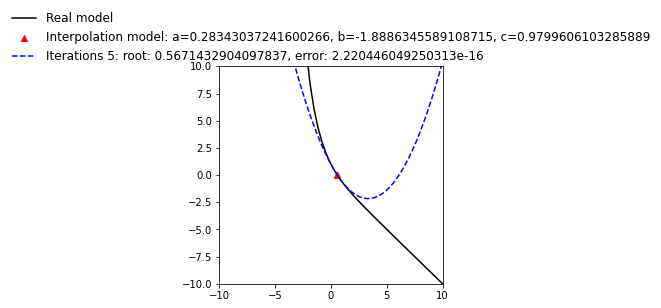

In [4]:
root, _ = Muller(func,-10,10)

In [5]:
root 

0.5671432904097837

In [6]:
def Muller2(f,x0,x1,itmax = 100, tolerancia=1e-14):
    
    error = 1
    it = 0
    
    # Tercer punto igual al punto medio
    x2 = (x0 + x1)/2. 
    
    while error > tolerancia and it < itmax:
        
        
        # Primera diferencia dividida
        h1 = x1-x0
        d1 = (f(x1) - f(x0))/h1
        h2 = x2-x1
        d2 = (f(x2) - f(x1))/h2
          
        print(d1,d2)
                
        a = (d2 - d1)/(h2-h1)
        b = d2 + a*h2 
        c = f(x2) 
        
        print(a,b,c)
        
        # Actualizamos la siguiente iteración
        
        if b < 0:
            x3 = x2 + (-2*c)/(b-np.sqrt(b**2-4*a*c))
        elif b >= 0:
            x3 = x2 + (-2*c)/(b+np.sqrt(b**2-4*a*c))
        
        error = np.abs( (x3-x2)/x3 )
        
        # Actualizamos
        x0 = x1
        x1 = x2
        x2 = x3
        
        it += 1
    
    print('Convergencia en: ',it)
        
    return x3,it

In [7]:
root, _ = Muller2(func,0,1)

-1.6321205588285577 -1.4773024370823822
-0.103212081164117 -1.4256963965003238 0.10653065971263342
-1.4773024370823822 -1.5845395526718995
-0.18671951312885354 -1.59841691169699 -0.011235415687904649
-1.5845395526718995 -1.5650718112433193
-0.2392883639238626 -1.563388448539026 -0.0002253378329435396
-1.5650718112433193 -1.5671026146100349
-0.2947151317926327 -1.5670601351262374 5.403217383515013e-07
-1.5671026146100349 -1.5671433883931989
-0.2822062010598142 -1.5671434856977833 -2.867073245482743e-11
-1.5671433883931989 -1.567141626109014
-5.11076781406402 -1.567141626015513 0.0
Convergencia en:  6


In [8]:
root

0.5671432904097838